# setups

In [ ]:
!pip install scikit-fuzzy

: 

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Fuzzy variables

## define Antecedent

In [2]:
Go = ctrl.Antecedent(np.arange(0, 5.05, 0.05), 'Go')
S = ctrl.Antecedent(np.arange(0, 8.05, 0.05), 'service')
out = ctrl.Antecedent(np.arange(0, 4.05, 0.05), 'out')

## define Consequent

In [3]:
E = ctrl.Consequent(np.arange(0, 1.05, 0.05), 'Evaluation')

## membership function
## Visualize the variable and its membership functions

c:\Users\Dell\AppData\Local\Programs\Python\Python37\lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


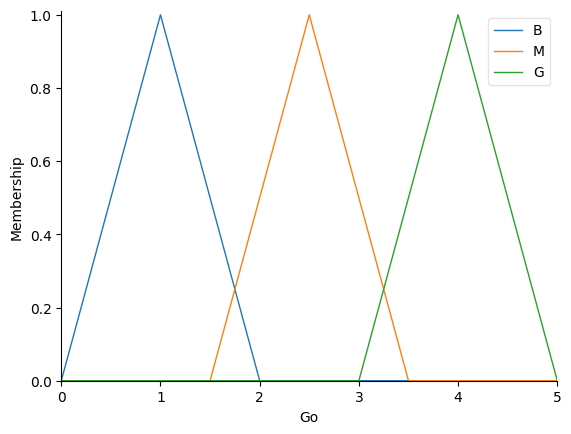

In [4]:
Go['B'] = fuzz.trimf(Go.universe, [0 , 1 , 2])
Go['M'] = fuzz.trimf(Go.universe, [1.5, 2.5 , 3.5])
Go['G'] = fuzz.trimf(Go.universe, [3, 4, 5])

Go.view()

c:\Users\Dell\AppData\Local\Programs\Python\Python37\lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


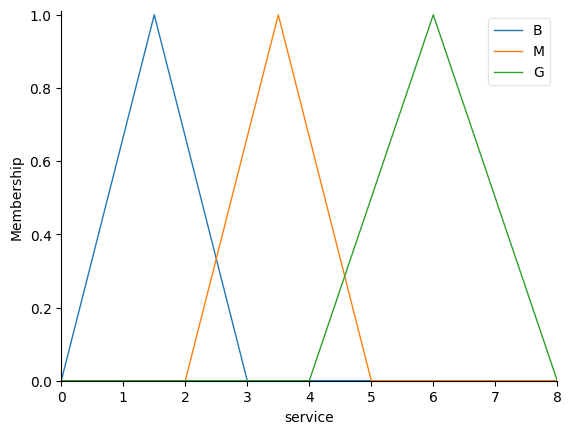

In [5]:
S['B'] = fuzz.trimf(S.universe, [0 , 1.5 , 3])
S['M'] = fuzz.trimf(S.universe, [2, 3.5 , 5])
S['G'] = fuzz.trimf(S.universe, [4, 6, 8])

S.view()

c:\Users\Dell\AppData\Local\Programs\Python\Python37\lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


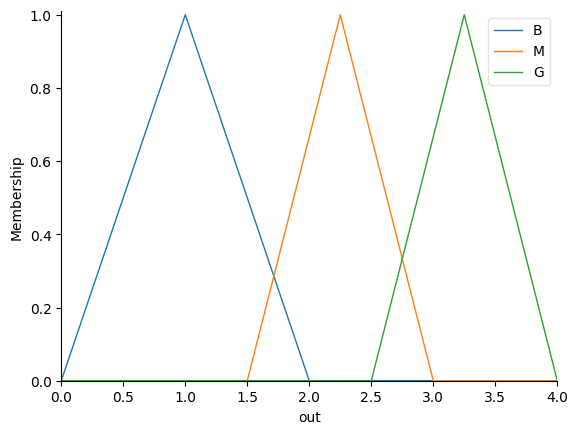

In [6]:
out['B'] = fuzz.trimf(out.universe, [0 , 1 , 2])
out['M'] = fuzz.trimf(out.universe, [1.5, 2.25 , 3])
out['G'] = fuzz.trimf(out.universe, [2.5,3.25 , 4])

out.view()

c:\Users\Dell\AppData\Local\Programs\Python\Python37\lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


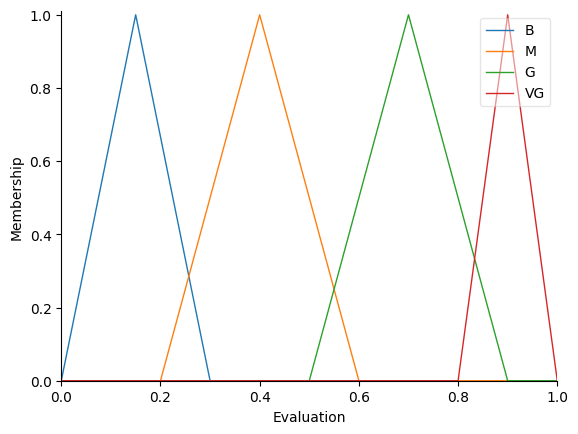

In [7]:
E['B'] = fuzz.trimf(E.universe, [0 , 0.15 , 0.3])
E['M'] = fuzz.trimf(E.universe, [0.2, 0.4 , 0.6])
E['G'] = fuzz.trimf(E.universe, [0.5,0.7 , 0.9])
E['VG'] = fuzz.trimf(E.universe, [0.8,0.9 , 1])

E.view()

# define Rules

In [8]:
# Base 1
r1 = ctrl.Rule(Go['B'] & S['G'] & out['B'], E['B'])
r2 = ctrl.Rule(out['G'], E['G'])
r3 = ctrl.Rule(Go['B'], E['B'])



In [9]:
Spare_Management = ctrl.ControlSystem([r1,r2,r3])

In [10]:
SM = ctrl.ControlSystemSimulation(Spare_Management)

In [19]:
# from Admin
SM.input['Go'] = 1
SM.input['service'] = 7
SM.input['out'] = 1

In [22]:
SM.compute()

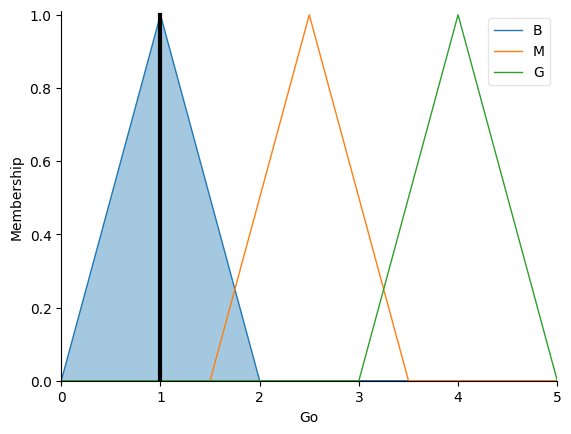

In [23]:
Go.view(sim=SM)

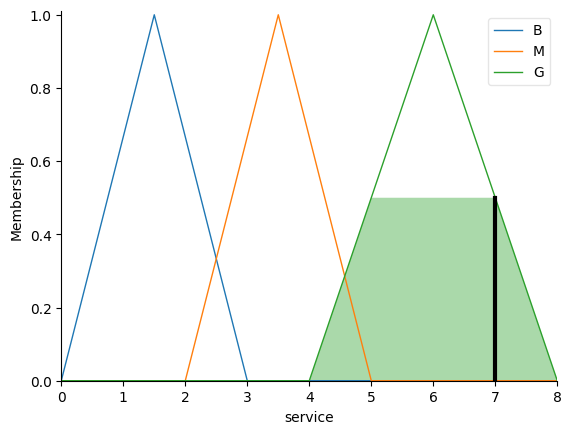

In [24]:
S.view(sim=SM)

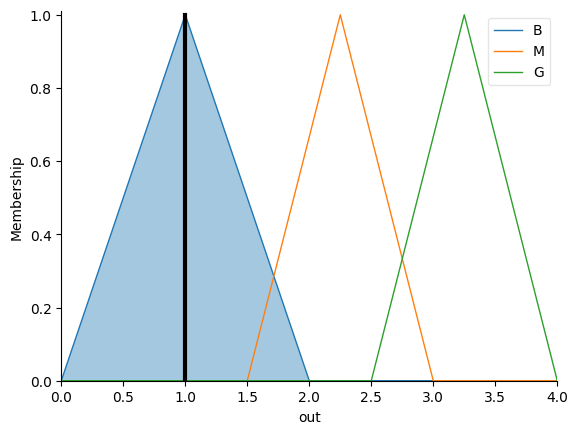

In [25]:
out.view(sim=SM)

In [ ]:
print(SM.output['Evaluation'])

0.15


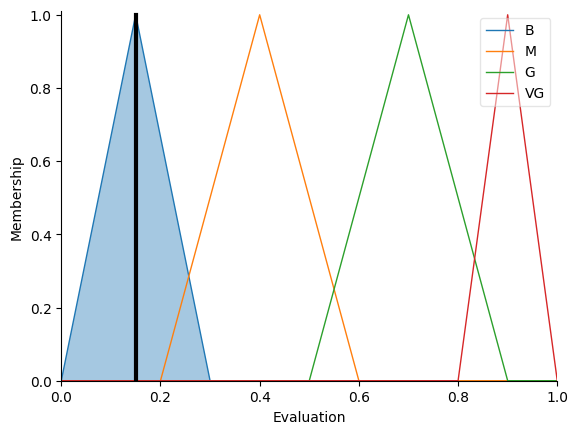

In [27]:
E.view(sim=SM)